<a href="https://colab.research.google.com/github/PALLADIUM26/ML/blob/main/ML12_hcad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

12.	Perform hierarchical clustering such as Agglomerative algorithm and Divisive algorithm to group several vehicles. Utilize single, complete and average linkage to define the cluster. Also draw the dendogram for this problem.
Dataset: Vehicle dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# Load dataset
# df = pd.read_csv('Vehicle_dataset.csv')
df = pd.read_csv('/content/cars_clus.csv')

In [3]:
# Step 1: Load & Clean Data
df.replace('$null$', np.nan, inplace=True)
df.dropna(inplace=True)

In [4]:
# Convert necessary columns to numeric
cols_to_convert = ['engine_s', 'horsepow', 'wheelbas', 'width', 'length',
                   'curb_wgt', 'fuel_cap', 'mpg']
df[cols_to_convert] = df[cols_to_convert].astype(float)

In [5]:
# Step 2: Select Features for Clustering
features = df[cols_to_convert]

In [ ]:
# Step 3: Standardize Features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [22]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'single')
X = features.values
y_hc = hc.fit_predict(X)
print(y_hc)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 2 0 0 0 0 0 0 0 0 4 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


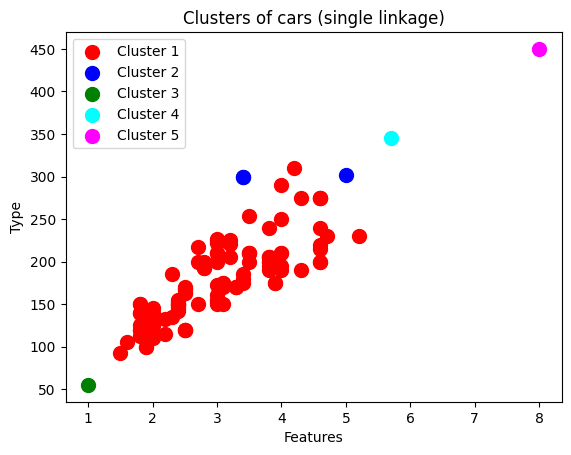

In [23]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of cars (single linkage)')
plt.xlabel('Features')
plt.ylabel('Type')
plt.legend()
plt.show()

In [24]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'complete')
X = features.values
y_hc = hc.fit_predict(X)
print(y_hc)

[0 1 1 0 1 3 1 1 0 1 1 1 3 3 1 0 0 0 0 1 3 0 4 0 0 1 0 1 0 0 0 2 1 0 1 0 0
 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 3 3 1 0 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 3 3 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 3 3 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0]


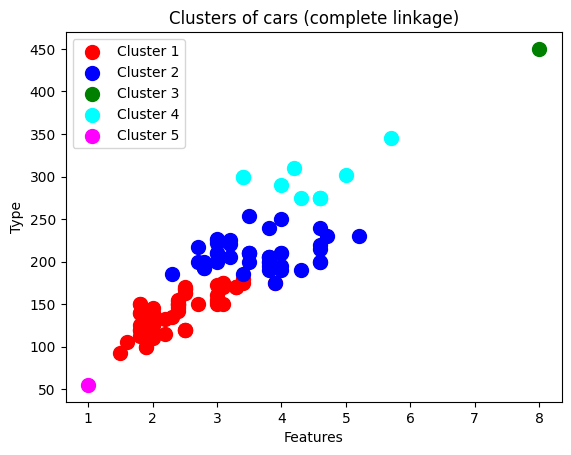

In [25]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of cars (complete linkage)')
plt.xlabel('Features')
plt.ylabel('Type')
plt.legend()
plt.show()

In [26]:
hc = AgglomerativeClustering(n_clusters = 5, linkage = 'average')
X = features.values
y_hc = hc.fit_predict(X)
print(y_hc)

[4 1 1 4 1 0 1 1 4 0 1 1 0 0 1 4 4 4 4 1 0 4 2 4 4 1 4 0 4 4 4 3 1 4 4 4 4
 4 1 4 4 1 1 4 0 4 1 4 4 4 1 1 4 4 4 1 4 1 1 1 1 0 0 1 4 4 4 1 4 1 4 4 4 4
 1 1 4 1 1 0 0 4 4 1 4 4 4 0 1 4 4 4 4 4 4 1 1 1 1 0 0 4 4 4 4 4 1 4 4 4 4
 1 4 4 4 4 4]


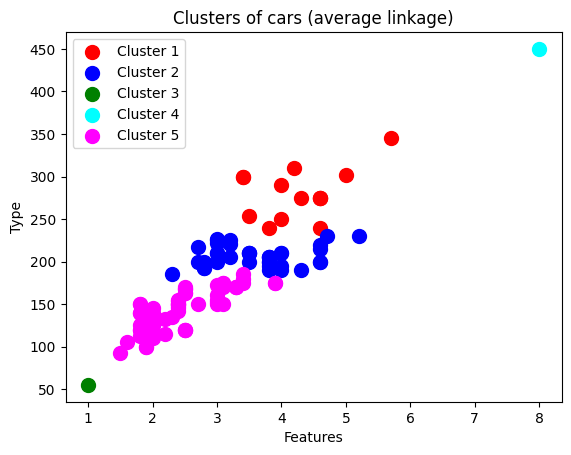

In [27]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of cars (average linkage)')
plt.xlabel('Features')
plt.ylabel('Type')
plt.legend()
plt.show()

In [ ]:
# Step 4 & 5: Dendrograms with 3 Linkage Types
linkage_methods = ['single', 'complete', 'average']
labels = df['manufact'] + ' ' + df['model']

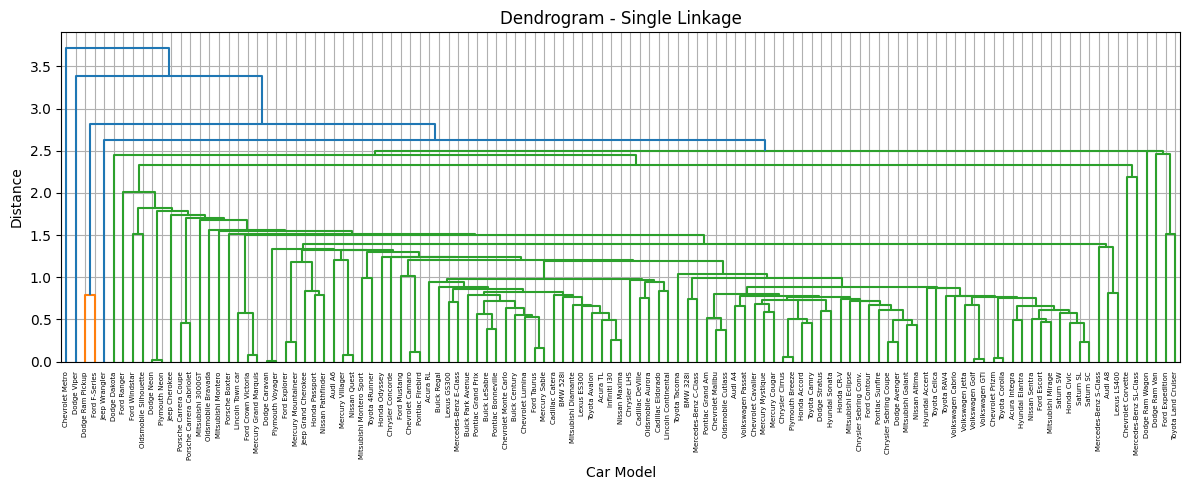

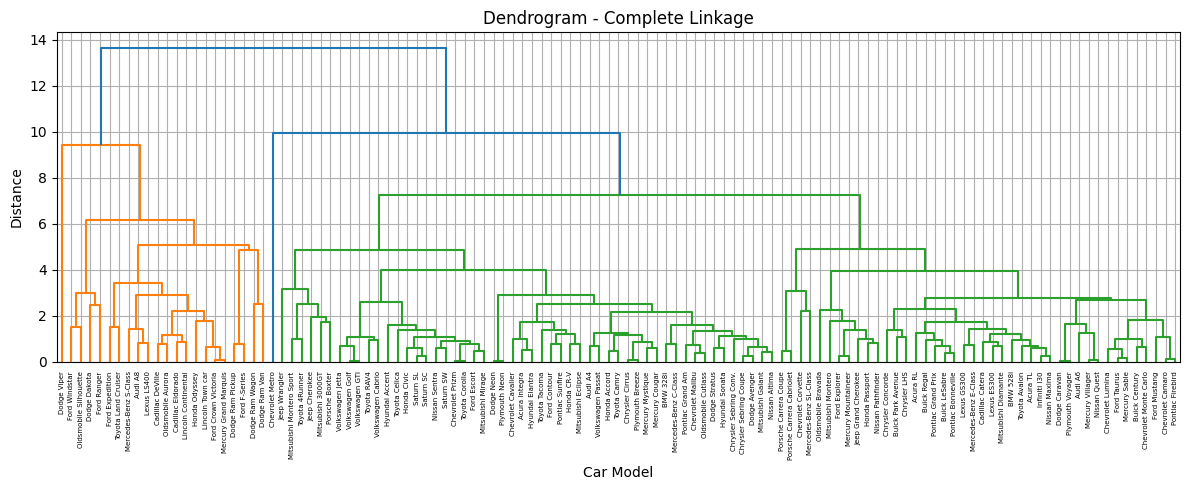

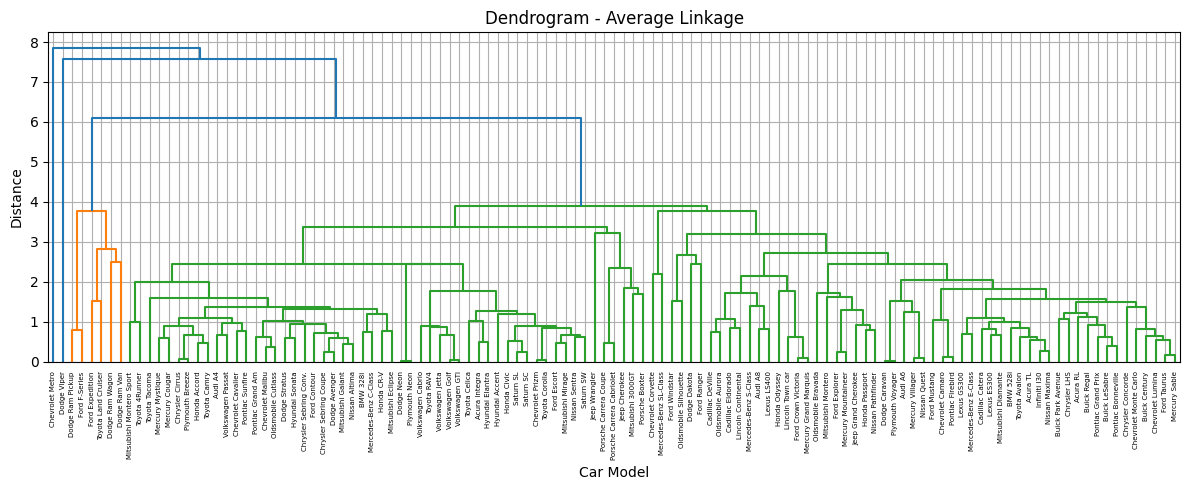

In [ ]:
for method in linkage_methods:
    plt.figure(figsize=(12, 5))
    Z = linkage(scaled_features, method=method)
    dendrogram(Z, labels=labels.values, leaf_rotation=90)
    plt.title(f'Dendrogram - {method.capitalize()} Linkage')
    plt.xlabel('Car Model')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.grid(True)
    plt.show()